In [3]:
# Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [4]:
#Read data
weather = pd.read_csv('Resources/dataLargerSet-Copy1.csv')
weather.head()

,Unnamed: 0,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [5]:
#Clean Data
weatherClean=weather.drop(["Unnamed: 0", "index"], axis=1)
weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [128]:
weatherClean.columns

Index(['winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity'],
      dtype='object')

In [129]:
# Data Pre-Processing
X= weatherClean.drop(['winery', 'vintage', 'points', 'cities'], axis=1)
y= weatherClean['points'].tolist()
# print(X.shape, y)
# print(y)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [131]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [132]:
df = pd.DataFrame({'Activity': y_train})
y_temp2 = df['Activity'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(x)
# df['Activity'] = x_scaled

df = pd.DataFrame({'Activity': y_train})
y_temp3 = df['Activity'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()

y_scaler = MinMaxScaler().fit(y_temp2)

y_train_scaled = y_scaler.transform(y_temp2)
y_test_scaled = y_scaler.transform(y_temp3)

# y_train_scaled
# y_test_scaled

In [134]:
# Create Deep Learning Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [135]:
# Create model and add layers****************************
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=200, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=1))

In [138]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [139]:
model.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 200)               7400      
_________________________________________________________________
dense_19 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 201       
Total params: 47,801
Trainable params: 47,801
Non-trainable params: 0
_________________________________________________________________


In [140]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)

(996, 36)
(996, 1)


In [141]:
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
32/32 - 0s - loss: 0.0456 - mse: 0.0456
Epoch 2/60
32/32 - 0s - loss: 0.0260 - mse: 0.0260
Epoch 3/60
32/32 - 0s - loss: 0.0256 - mse: 0.0256
Epoch 4/60
32/32 - 0s - loss: 0.0268 - mse: 0.0268
Epoch 5/60
32/32 - 0s - loss: 0.0254 - mse: 0.0254
Epoch 6/60
32/32 - 0s - loss: 0.0244 - mse: 0.0244
Epoch 7/60
32/32 - 0s - loss: 0.0266 - mse: 0.0266
Epoch 8/60
32/32 - 0s - loss: 0.0250 - mse: 0.0250
Epoch 9/60
32/32 - 0s - loss: 0.0251 - mse: 0.0251
Epoch 10/60
32/32 - 0s - loss: 0.0250 - mse: 0.0250
Epoch 11/60
32/32 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 12/60
32/32 - 0s - loss: 0.0278 - mse: 0.0278
Epoch 13/60
32/32 - 0s - loss: 0.0249 - mse: 0.0249
Epoch 14/60
32/32 - 0s - loss: 0.0239 - mse: 0.0239
Epoch 15/60
32/32 - 0s - loss: 0.0243 - mse: 0.0243
Epoch 16/60
32/32 - 0s - loss: 0.0249 - mse: 0.0249
Epoch 17/60
32/32 - 0s - loss: 0.0249 - mse: 0.0249
Epoch 18/60
32/32 - 0s - loss: 0.0242 - mse: 0.0242
Epoch 19/60
32/32 - 0s - loss: 0.0256 - mse: 0.0256
Epoch 20/60
32/32 - 0

In [142]:
# history.history

In [144]:
# Make Predictions
encoded_predictions = model.predict_classes(X_test_scaled)
y_predictions = y_scaler.inverse_transform(encoded_predictions)

C:\Users\Tempe\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [145]:
print(f"Predicted classes: {y_predictions[:5]}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [[80.]
 [99.]
 [80.]
 [80.]
 [80.]]
Actual Labels: [90, 93, 86, 88, 85]


In [146]:
from numpy import mean, absolute 

# mean(absolute(weatherClean["y_test"] - weatherClean["y_predictions"]))


from sklearn.metrics import accuracy_score
accuracy_score(y_test[:5], y_predictions[:5], normalize=False)

0

In [147]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predictions), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predictions), 2))
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec21/computing-regression-accuracy

Mean absolute error = 8.77
Mean squared error = 84.73
Median absolute error = 8.0
Explain variance score = -5.38
R2 score = -9.25


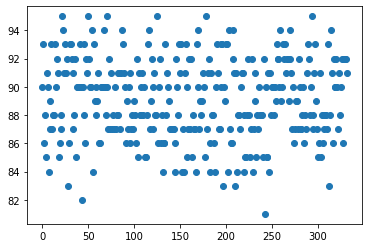

In [148]:
import matplotlib.pyplot as plt
xx=[z for z in range(0,len(y_test))]
plt.scatter(xx,y_test)
plt.show()

In [150]:
dfAccur=pd.DataFrame( )
dfAccur["y_test"]= y_test
dfAccur["y_predictions"]= y_predictions
dfAccur.head(100)

,y_test,y_predictions
0,90,80.0
1,93,99.0
2,86,80.0
3,88,80.0
4,85,80.0
...,...,...
95,86,80.0
96,91,99.0
97,87,80.0
98,88,80.0
